In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

In [14]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
# len(x_train)

In [16]:
# len(x_test)

In [17]:
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [18]:
# plt.matshow(x_train[2])

In [19]:
X_train = X_train / 255
X_test = X_test / 255 
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_test.shape[1]

In [20]:
# y_train[:10]

In [28]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [29]:
# x_train_flatten.shape

In [30]:
X_train.shape

(60000, 28, 28)

In [32]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# model = keras.Sequential()
# model.add(Conv2D(32, (1, 1), input_shape=(1, 28, 28), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Conv2D(16, (1, 1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='sigmoid'))

# model = keras.Sequential([
#     Conv2D(32,3, activation='relu', input_shape=(28,28,)),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(3, 3)),

#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(2,activation='softmax')  # activation change
# ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs = 5)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3431 - accuracy: 0.8981
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0925 - accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0546 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0339 - accuracy: 0.9897


In [34]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0798 - accuracy: 0.9782


[0.07980132102966309, 0.9782000184059143]

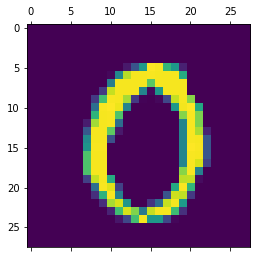

In [36]:
n = 13
plt.matshow(X_test[n])

In [37]:
prediction = model.predict(X_test_flatten)
prediction[n]

array([0.9999826 , 0.03160128, 0.00907946, 0.09241545, 0.01103544,
       0.09636396, 0.16099846, 0.74964195, 0.0074288 , 0.78441334],
      dtype=float32)

In [38]:
np.argmax(prediction[n])

0

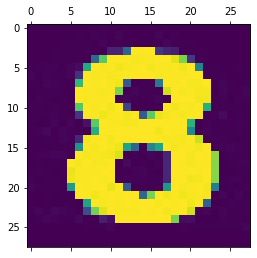

In [45]:
img = cv2.imread('./tmp_img_68550.jpg', 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
plt.matshow(img)

In [46]:
img_flatten = img.reshape(1, 28*28)
img_flatten.shape

(1, 784)

In [47]:
img_prediction = model.predict(img_flatten)
np.argmax(img_prediction)

3